#### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"> 🎫  APP BEHAVIOUR ANALYSIS</p>
<img src = "https://secure2.sfdcstatic.com/assets/images/hub/analytics/mobile-analytics-tools/mobile-analytics-header.jpg" align="center" width=700 />


### Table of Contents

1  Goal Of The Project

2  Data Overview

3  Importing the libraries

4  Read The Data

5  EDA

6  Feature Engineering - Time between signup and enrollment

7  Feature Engineering - Screens Accessed

8  Data Preprocessing

9.1  Creating Train/Test SplitsGoal Of The ProjectGoal Of The ProjectGoal Of The ProjectGoal Of The Project

9.2  Feature Scaling

10  Model Building

11  Presenting Final Results

12  Conclusion

##### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"> 🎫 Goal Of The Project </p>
The provided dataset is from a fintech company that offers a mobile app with both free and subscription versions. The paid version grants users access to all their financial information in one place. Upon joining the app, users receive the paid version for free on the first day. The objective of this project is to develop a classification model to predict which users will enroll in the paid subscription and which will not.

The company has provided two datasets. The first dataset (appdata10) contains information about all the features of the app that users utilized. The second dataset (top_screens) provides information about the top screens visited by users.


##### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"> 🎫  Data Overview</p>
We have access to each customer's app behavior data, which includes the date and time of app installation, as well as the features the user engaged with in the app. App behavior is characterized by the list of app screens the user viewed and whether the user played any financial mini-games available.

The app usage data is limited to the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features, and the company aims to target them with new offers shortly after the trial ends.

The data fields we'll be working with are as follows:

1.User: The first column, 'user,' serves as the user identifier. In some cases, it might be an email ID, but in this case, it is a numerical ID representing a specific user.

2.First_open: The second column, 'first_open,' specifies the date and time when the user first opened the app.

3.Day of the week: It represents the day of the week, with 0 indicating Sunday and 6 indicating Saturday.

4.Hour: It indicates the hour of the day when the user first opened the app.

5.Age: It denotes the age of the user.

6.Screen list: This column is perhaps the most crucial feature in this case study. It describes every single screen that the user accessed within those 24 hours.

7.Num_screens: It represents the total number of screens that appear in the 'screen list' column.

8.Mini_game: The app features a mini-game that is free to play. If the player engages with the mini-game within the first 24 hours, they receive a 1; otherwise, they receive a 0.

9.Like: If the user likes any feature, they receive a 1; otherwise, they receive a 0.

10.Used premium feature: If the user has used a premium feature, they receive a 1; otherwise, they receive a 0.

11.Enrolled: If the user continues to use the product after the free trial, they receive a 1; otherwise, they receive a 0.

12.Enrolled date: This column provides the date of enrollment.

## Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from dateutil import parser  #convert time in date time data type
print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## About Data:
- Read data
- Shape of data
- Head of data
- Data info
- Data describe
- Data Columns
- Checking null values



### Read the Data

In [2]:

df=pd.read_csv("appdata10.csv")

### Shape of data

In [ ]:
 
df.shape

### Head of the data

In [4]:

df.head() 

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


### Data Info 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


### Data describe

In [6]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


### Data Columns

In [7]:
df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

### Checking the null values

In [8]:

df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

### Data unique value

In [9]:

features=df.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {}\n""".format(i,df[i].unique(),len(df[i].unique())))

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874

Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747

Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7

Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24

Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89  78  86  80  82  79  87  81  85
 101  88  83 100  84  9

In [10]:
df['age'].value_counts()

23     2348
25     2339
26     2301
24     2298
22     2222
       ... 
89        2
79        1
101       1
88        1
98        1
Name: age, Length: 78, dtype: int64

## Exploratory Data Analysis

### Converting time from object to an integer

In [11]:
df['hour'] = df.hour.str.slice(1,3).astype(int)

In [12]:
df['open_year'] = df.first_open.str.slice(0,4).astype(int)

In [13]:
df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,open_year
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0,2012
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0,2012
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1,2013
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,2013
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,2013
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0,2013
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0,2013
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,2013


<Axes: xlabel='used_premium_feature', ylabel='count'>

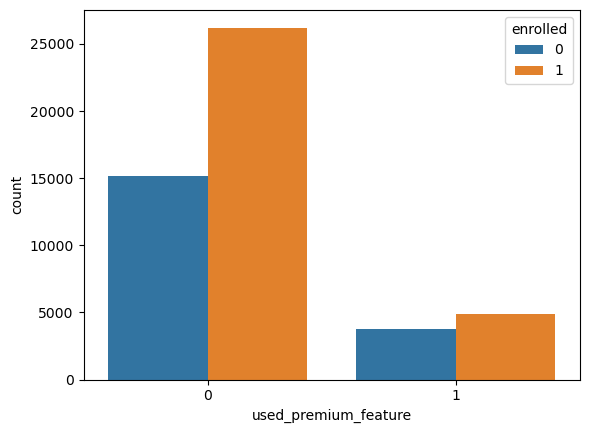

In [14]:
sns.countplot(df,x="used_premium_feature",hue="enrolled")

In [15]:
print('Not used preminum feature Users=',(df.used_premium_feature <1).sum(),'out of 50000')
print('used preminum feature Users=',50000-(df.used_premium_feature<1).sum(),'out of 50000')

Not used preminum feature Users= 41399 out of 50000
used preminum feature Users= 8601 out of 50000


Text(0.5, 1.0, 'enrolled Ratio')

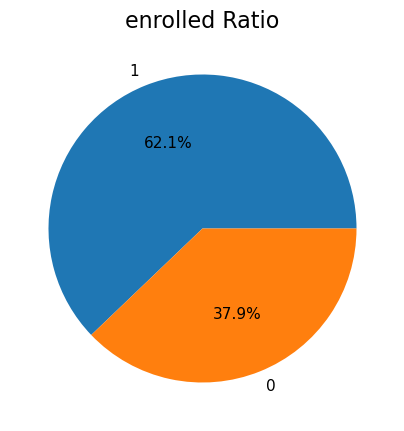

In [16]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 11
data = df["enrolled"].value_counts()
plt.pie(data,labels=data.index,autopct='%1.1f%%')
plt.title('enrolled Ratio',fontdict={'fontsize': 16})

<Axes: xlabel='enrolled', ylabel='count'>

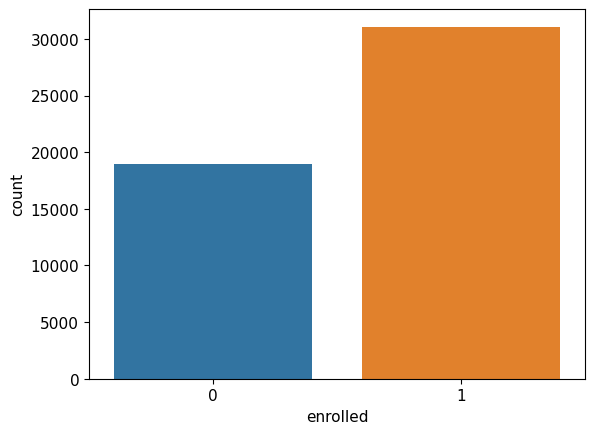

In [17]:
sns.countplot(df,x="enrolled")

In [18]:
print('Not Enrolled Users=',(df.enrolled <1).sum(),'out of 50000')
print('Enrolled Users=',50000-(df.enrolled <1).sum(),'out of 50000')

Not Enrolled Users= 18926 out of 50000
Enrolled Users= 31074 out of 50000


<Axes: xlabel='minigame', ylabel='count'>

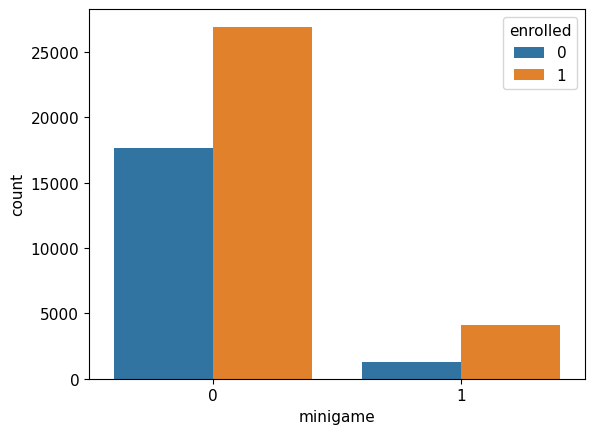

In [19]:
sns.countplot(df,x="minigame",hue="enrolled")

<Axes: xlabel='liked', ylabel='count'>

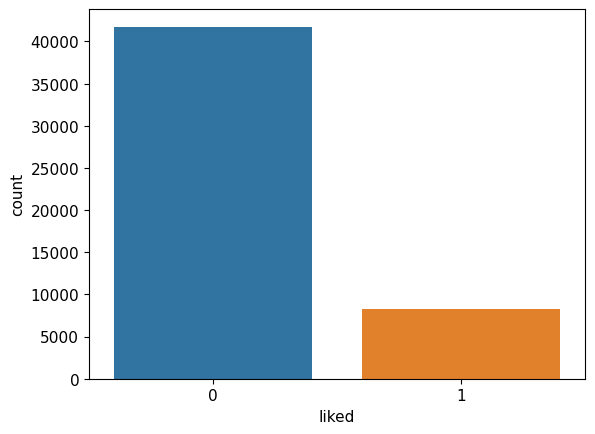

In [20]:
sns.countplot(df,x="liked")

<Axes: xlabel='liked', ylabel='count'>

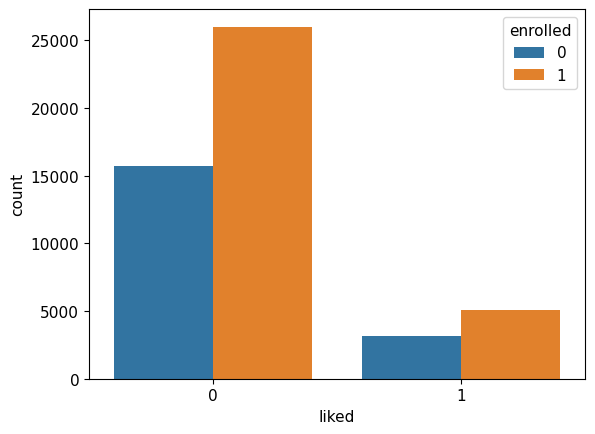

In [21]:
sns.countplot(df,x="liked",hue="enrolled")

<Axes: xlabel='open_year', ylabel='count'>

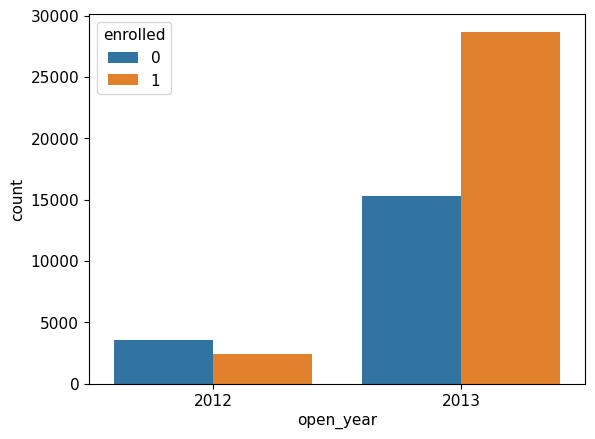

In [22]:
sns.countplot(df,x="open_year",hue="enrolled")

In [23]:
df.drop(columns='open_year',inplace=True)

#### Creating a copy of dataset and dropping columns

In [24]:
new_df=df.drop(['user','first_open','screen_list'
                ,'enrolled_date'],axis=1)

### Heatmap

Text(0.5, 1.0, 'Heatmap using correlation matrix of new_df')

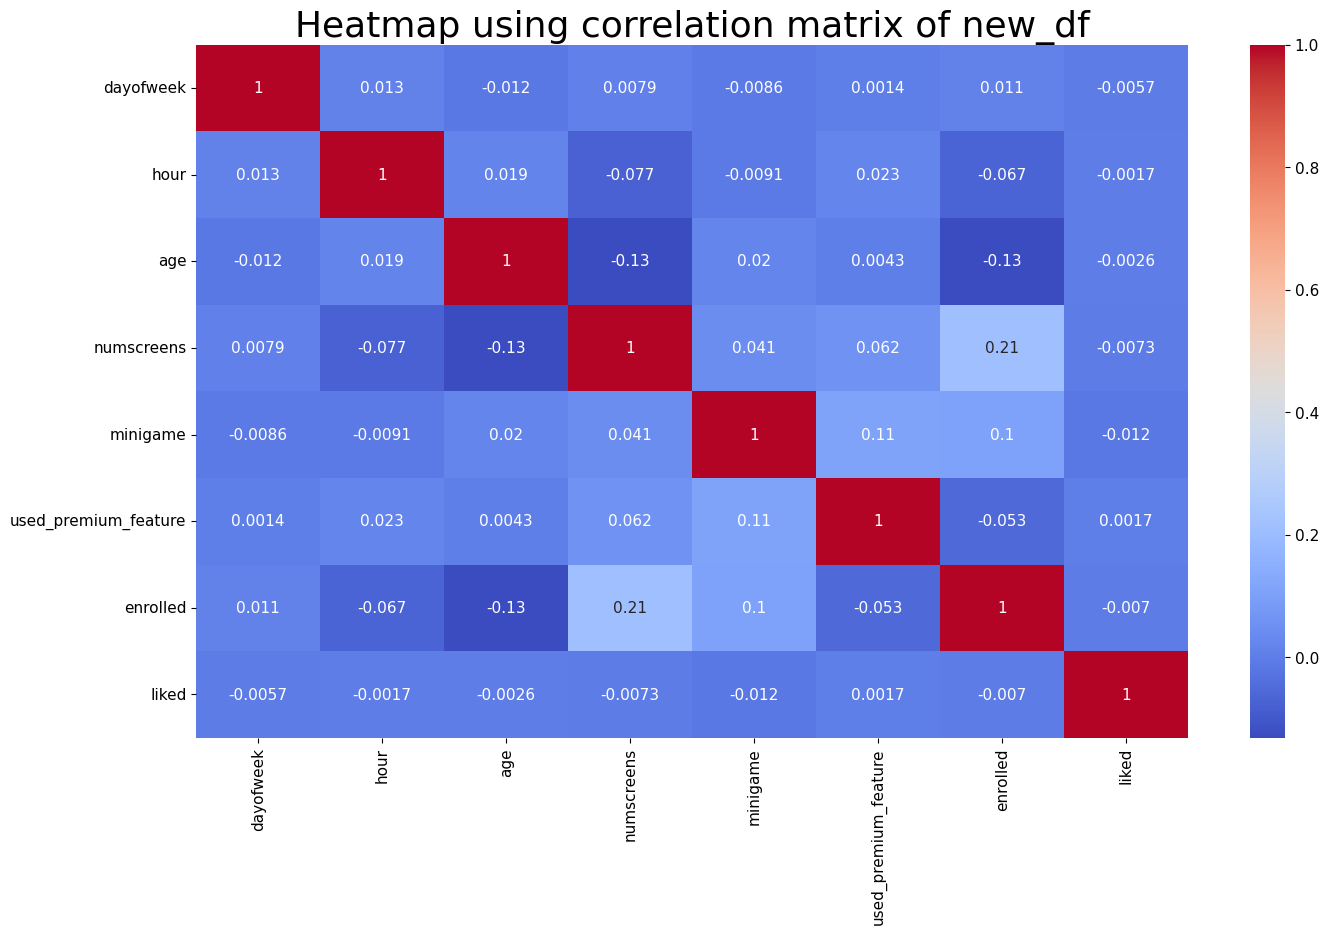

In [25]:
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap using correlation matrix of new_df',fontsize=26)

The heatmap correlation illustrates the relationships between features. The graph above not only indicates positive or negative relationships but also quantifies the strength of these relationships. A very high positive or negative number indicates the extent to which the features are correlated, either positively or inversely. For example, the relationship between the number of screens and age is indicated as -0.13, signifying an inverse correlation with a relatively strong strength. Conversely, enrollment shows a positive correlation of 0.21 with the number of screens.

In [26]:
#sns.pairplot(new_df,hue='enrolled')

### Plotting Histogram for exploartion

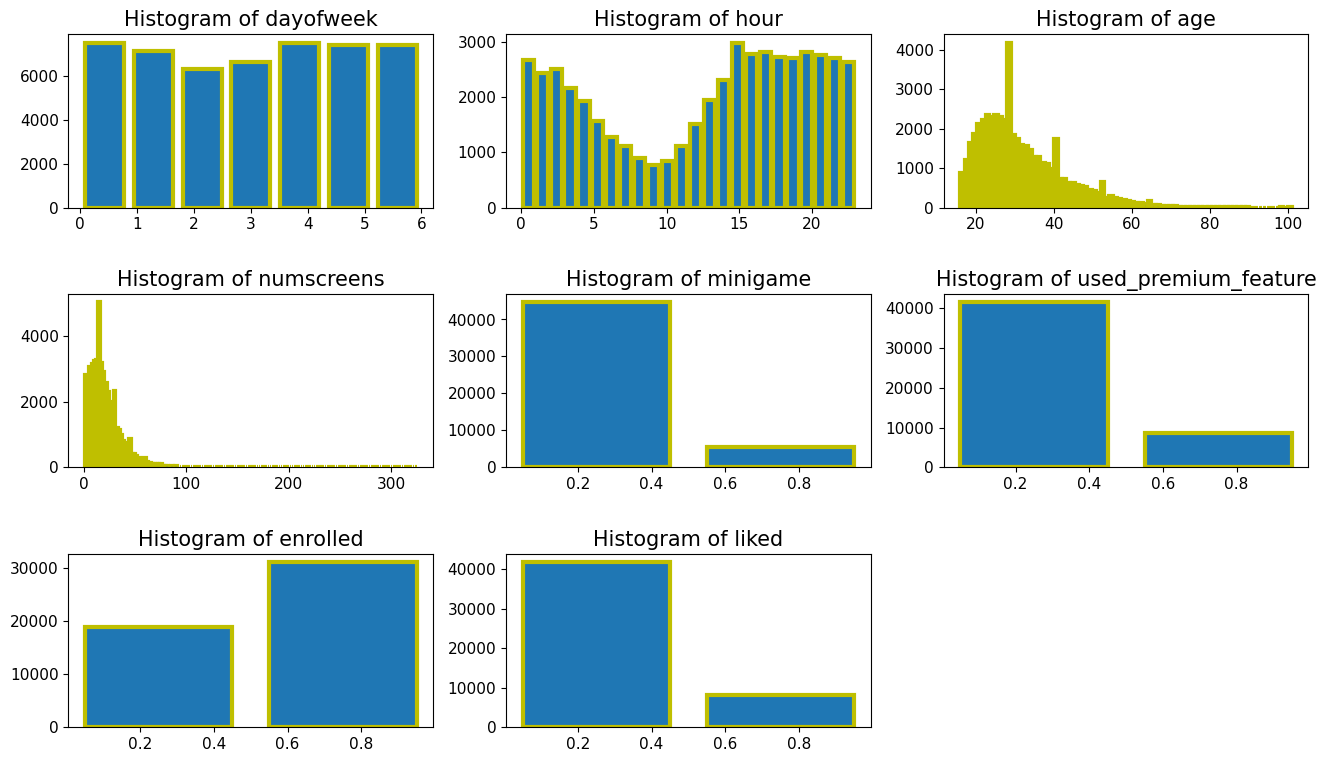

In [27]:
plt.figure(figsize=(16,9))
features=new_df.columns
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    plt.title('Histogram of {}'.format(j),fontsize=15)
    bins=len(new_df[j].unique())
    plt.hist(df[j],bins=bins,rwidth=0.8,edgecolor='y',linewidth=3,)
plt.subplots_adjust(hspace=0.5)

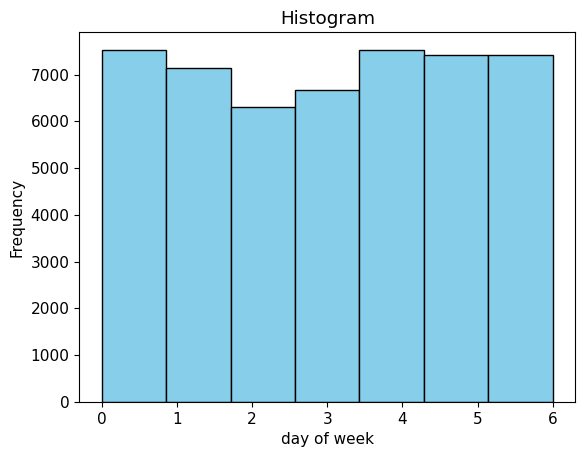

In [28]:
plt.hist(df['dayofweek'], bins=7,color='skyblue', edgecolor='black')
plt.xlabel('day of week')
plt.ylabel('Frequency')
plt.title('Histogram')
 
# Display the plot
plt.show() 

array([[<Axes: title={'center': 'age'}>]], dtype=object)

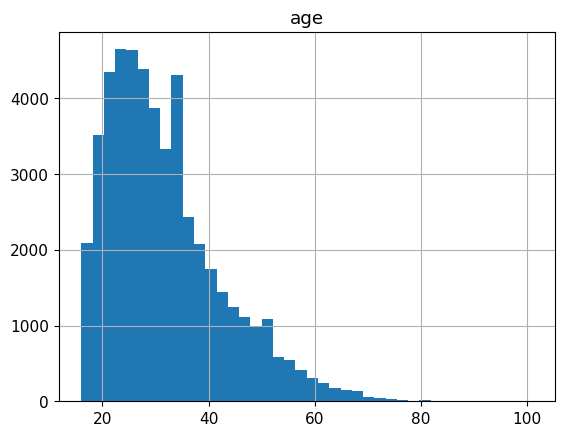

In [29]:
df.hist(column='age', bins = 40)

array([[<Axes: title={'center': 'numscreens'}>]], dtype=object)

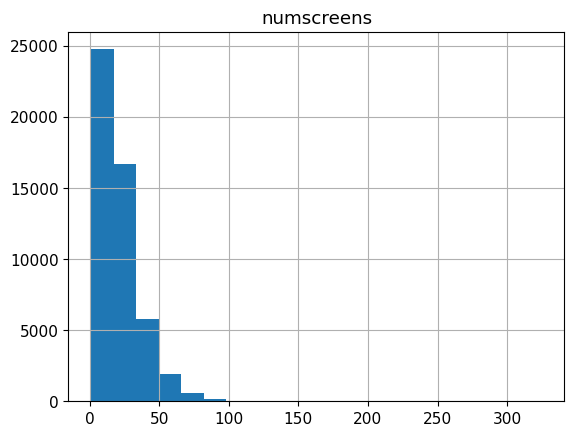

In [30]:
df.hist(column='numscreens', bins=20)

Q. What we observe

HIstograms show where most of the customers fall as per the columns/features we are analyzing. In this analysis, three features are considered: day of the week, age, and number of screens.

Day of the week: The majority of users interact with the app on weekdays 5 and 6, or on Saturday and Sunday, while the turnout on other days is relatively low.

Age: The histogram indicates that the majority of users are younger, with usage declining as age increases (inversely proportional).

Number of screens: The histogram reveals that most users interact with 0-20 screens (~25,000), with another significant category falling within the 20-40 screen range. However, very few customers exceed 40 screens.

### Building Correlation Matrix to see how these vairables affect the Response

In [31]:
new_df2=df.drop(['user','first_open','screen_list'
                ,'enrolled_date','enrolled'],axis=1)

<Axes: title={'center': 'Correlation all features with enrolled '}>

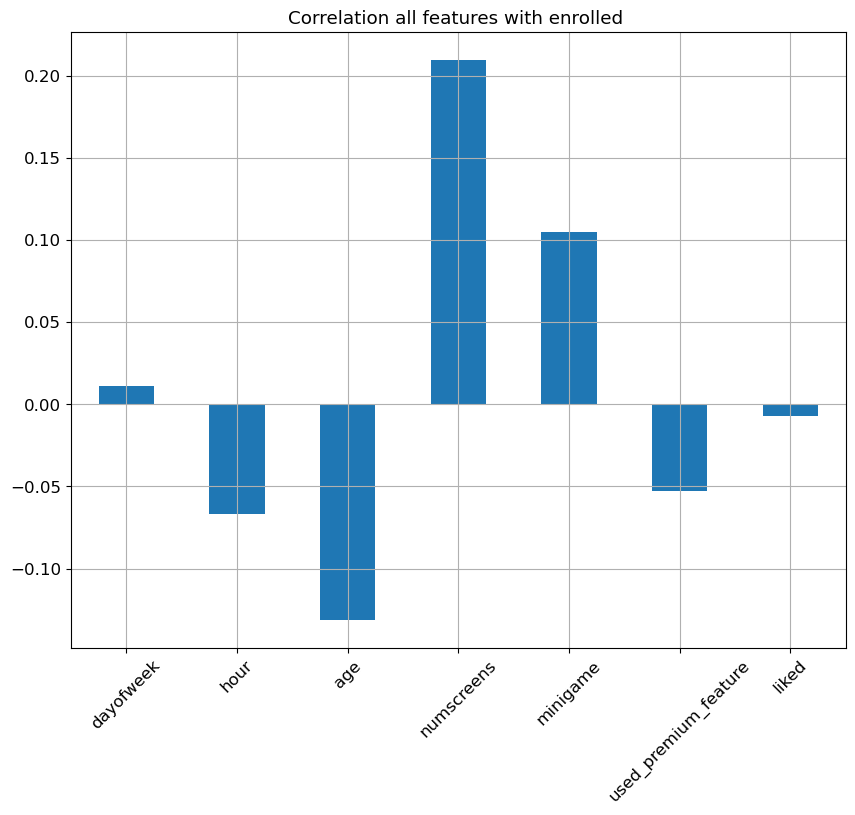

In [32]:
new_df2.corrwith(df.enrolled).plot.bar(figsize=(10,8),
                  title = 'Correlation all features with enrolled ',
                  fontsize = 12, rot = 45,
                  grid = True)

Findings:

1.Older people tend to sign up less.

2.The more screens someone used, the more likely they are to sign up.

3.People playing the mini-game tend to sign up, however it's a weak poositive correlation.

4.People who use the app at earlier hours tend to sign up less, however it's a very weak naegative correlation.

5.The more people use premium features, the less likely they are to enrol, however it's a very weak negative correlation.

6.Whether users like a feature or not seems to have no correlation on whether they sign up or not.



## Feature engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithm. 

In [33]:
# We need to convert first_open and enrolled_date to datetime's so we can calculate the difference in hours between them.

df['enrolled_date'] = pd.to_datetime(df['enrolled_date'])
df['first_open'] = pd.to_datetime(df['first_open'])

In [34]:
#Check for the datatypes
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [35]:
#Calculate the difference in the two dates to give the result in hours
df['time_to_enrolled'] = df['enrolled_date'] - df['first_open']

In [36]:
df['time_to_enrolled'] = df['time_to_enrolled'].apply(lambda x: x.total_seconds()/(60*60))
df['time_to_enrolled']

0             NaN
1             NaN
2             NaN
3        0.050877
4        0.096994
           ...   
49995    0.026390
49996         NaN
49997         NaN
49998    0.042895
49999         NaN
Name: time_to_enrolled, Length: 50000, dtype: float64

In [37]:
df.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.050877
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.096994


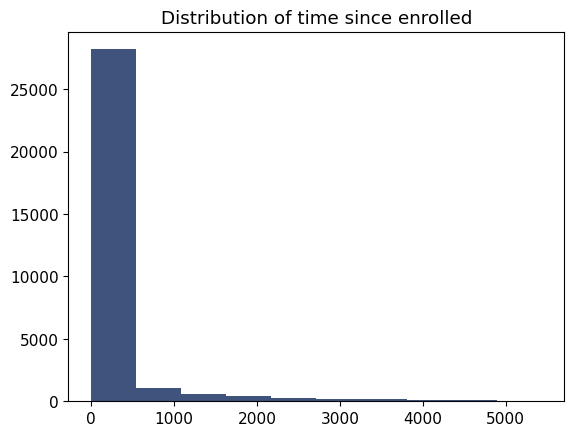

In [38]:
# Plot histogram of the difference variable
plt.hist(df['time_to_enrolled'].dropna(), color ='#3F537D')
plt.title('Distribution of time since enrolled')
plt.show()

Q. Comment on the distribution?

The distribution indicates that the majority of durations fall within a short range (0-450 hours), with approximately 25-30K entries. This suggests that most users enroll in the app within this timeframe after their initial usage.

Q. Why are we using dropna() here

The dropna() function removes all NAN values from the difference column. These NaN values occur when the enrollment date is null, as the difference is calculated as enroll - first open date. Therefore, if a customer has not enrolled, they will receive an NAN value in the difference field. Calculating a histogram for NAN values is not meaningful, so dropna() is used in the definition of the histogram.

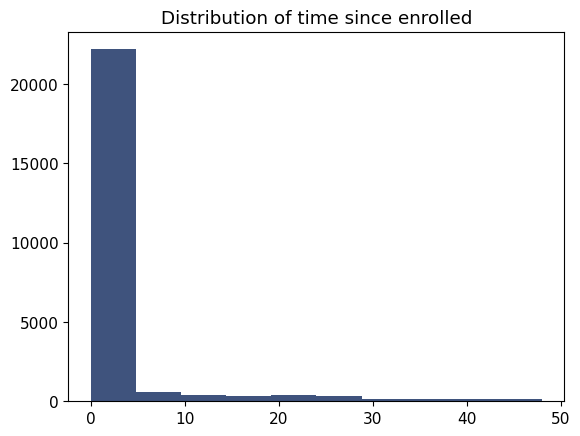

In [39]:
# PLot histogram for only the 48 hrs 
plt.hist(df['time_to_enrolled'].dropna(), color ='#3F537D', range =[0, 48])
plt.title('Distribution of time since enrolled')
plt.show()

Q. Why are we using the range in histogram

The histogram is filtered to include only customers who have enrolled within 48 hours of their first usage of the app. These customers are significant as they demonstrate a positive initial experience and prompt enrollment. Gathering feedback from these customers is crucial, as their experiences can inform strategies to attract more customers and enhance the app's functionality.

Upon observing the plot, it is evident that the majority of users enroll within the first 20 hours. 
After allowing for a brief gap period, a cutoff time of 48 hours or 2 days is decided upon. 
Any individuals who enrolled after the initial 48 hours are then converted to 0.






In [40]:
df.loc[df.time_to_enrolled> 48, 'enrolled'] = 0

Q. What is the purpose of the above code


In the above code, all rows where the difference exceeds 48 are being labeled as 0 in the enrolled field. Our analysis is focused solely on customers who enrolled within 48 hours of their initial app visit.






In [41]:
print('Not Enrolled Users=',(df.enrolled <1).sum(),'out of 50000')
print('Enrolled Users=',50000-(df.enrolled <1).sum(),'out of 50000')

Not Enrolled Users= 25213 out of 50000
Enrolled Users= 24787 out of 50000


In [42]:
# drop the difference, enrolled date and first open columns from the dataframe
df.drop(columns=['time_to_enrolled', 'first_open', 'enrolled_date'], inplace=True)

### Applying feature engineering on the screen_list
We need to convert the comma-separated list of screens accessed into a format suitable for modeling.

top_screens.csv is provided by the company and displays the top screen accessed by each user. We can utilize this to limit the number of columns generated to only those representing the top-accessed screens, thus reducing the number of features generated.

Our goal is to create a set of dummy variables for the top screens. That is, if the user has accessed a particular top screen, it will be represented as 1; otherwise, it will be 0. Additionally, we will create an 'Other_screen' field to maintain a count of the other non-top screens they have accessed.

In [43]:
# Import the most popular screens (screens that the user visited in the first 24 hr. period)
# only one column so convert to an array
top_screens = pd.read_csv("top_screens.csv").top_screens.values

In [44]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [45]:
# Separate screens into the separate lists
top_screens = list(map(lambda x: x.strip(),top_screens))

In [46]:
top_screens 

['Loan2',
 'location',
 'Institutions',
 'Credit3Container',
 'VerifyPhone',
 'BankVerification',
 'VerifyDateOfBirth',
 'ProfilePage',
 'VerifyCountry',
 'Cycle',
 'idscreen',
 'Credit3Dashboard',
 'Loan3',
 'CC1Category',
 'Splash',
 'Loan',
 'CC1',
 'RewardsContainer',
 'Credit3',
 'Credit1',
 'EditProfile',
 'Credit2',
 'Finances',
 'CC3',
 'Saving9',
 'Saving1',
 'Alerts',
 'Saving8',
 'Saving10',
 'Leaderboard',
 'Saving4',
 'VerifyMobile',
 'VerifyHousing',
 'RewardDetail',
 'VerifyHousingAmount',
 'ProfileMaritalStatus',
 'ProfileChildren',
 'ProfileEducation',
 'Saving7',
 'ProfileEducationMajor',
 'Rewards',
 'AccountView',
 'VerifyAnnualIncome',
 'VerifyIncomeType',
 'Saving2',
 'Saving6',
 'Saving2Amount',
 'Saving5',
 'ProfileJobTitle',
 'Login',
 'ProfileEmploymentLength',
 'WebView',
 'SecurityModal',
 'Loan4',
 'ResendToken',
 'TransactionList',
 'NetworkFailure',
 'ListPicker']

In [47]:

# Map screens to fields. We are adding a , so that we can count the screens because there is always going to be 1 less , for all the screen names

df['screen_list'] = df.screen_list.astype(str) + ','

In [48]:
df['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [49]:
#### Creating individual columns for the top screens
for sc in top_screens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc + ",", "")

In [50]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked', 'Loan2',
       'location', 'Institutions', 'Credit3Container', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category',
       'Splash', 'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1',
       'EditProfile', 'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1',
       'Alerts', 'Saving8', 'Saving10', 'Leaderboard', 'Saving4',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan

In [51]:
len(top_screens)

58

In [52]:
len(df.columns)

68

#### Adding a separate column for the unpopular screens

In [53]:
df["other_screen"] = df.screen_list.str.count(",")

In [54]:
df.drop(columns=['screen_list'],inplace=True)

In [55]:
#Check
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other_screen
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


### Creating funnels to remove columns which have high correlations amongest themselves.
#### For eg, Savings1,Savings2, etc all come under the savings heading and have different columns.
#### Due to this, they have high correlation in themselves.
#### Thus, creating funnels to remove these columns

#### Savings Funnel

In [56]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
df["SavingCount"] = df[savings_screens].sum(axis=1)
df = df.drop(columns=savings_screens)

#### Credit funnel

In [57]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(columns=cm_screens)

#### Credit card funnel

In [58]:
cradit_card_screens = ["CC1","CC1Category","CC3"]
df["Cradit_Card_Count"] = df[cradit_card_screens].sum(axis=1)
df = df.drop(columns=cradit_card_screens)

#### Loans funnel

In [59]:
loans_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df["Loans_Count"] = df[loans_screens].sum(axis=1)
df = df.drop(columns=loans_screens)

### Verify funnel

In [60]:
verify_screens = ["VerifyPhone",
               "BankVerification",
               "VerifyDateOfBirth",
               "VerifyCountry","VerifyMobile",
               "VerifyHousing","VerifyHousingAmount","VerifyAnnualIncome" ,"VerifyIncomeType" ]
df["verify_count"] = df[verify_screens].sum(axis=1)
df = df.drop(columns=verify_screens)

### Profile Funnel

In [61]:
profile_screens = ["ProfilePage","EditProfile","ProfileMaritalStatus","ProfileChildren","ProfileEducation","ProfileEducationMajor",
               "ProfileJobTitle",
               "ProfileEmploymentLength" ]
df["profile_count"] = df[profile_screens].sum(axis=1)
df = df.drop(columns=profile_screens)

In [62]:
#Check
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'Cycle', 'idscreen', 'Splash', 'RewardsContainer', 'Finances', 'Alerts',
       'Leaderboard', 'RewardDetail', 'Rewards', 'AccountView', 'Login',
       'WebView', 'SecurityModal', 'ResendToken', 'TransactionList',
       'NetworkFailure', 'ListPicker', 'other_screen', 'SavingCount',
       'CMCount', 'Cradit_Card_Count', 'Loans_Count', 'verify_count',
       'profile_count'],
      dtype='object')

In [63]:
df.head(2)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,TransactionList,NetworkFailure,ListPicker,other_screen,SavingCount,CMCount,Cradit_Card_Count,Loans_Count,verify_count,profile_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,7,0,0,0,1,2,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,5,0,0,0,1,3,0


In [64]:
len(df.columns)

35

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   user                  50000 non-null  int64
 1   dayofweek             50000 non-null  int64
 2   hour                  50000 non-null  int32
 3   age                   50000 non-null  int64
 4   numscreens            50000 non-null  int64
 5   minigame              50000 non-null  int64
 6   used_premium_feature  50000 non-null  int64
 7   enrolled              50000 non-null  int64
 8   liked                 50000 non-null  int64
 9   location              50000 non-null  int32
 10  Institutions          50000 non-null  int32
 11  Cycle                 50000 non-null  int32
 12  idscreen              50000 non-null  int32
 13  Splash                50000 non-null  int32
 14  RewardsContainer      50000 non-null  int32
 15  Finances              50000 non-null  int32
 16  Aler

## Creating the Dependent and Independent variables

In [66]:
X = df.drop(columns="enrolled")
y = df["enrolled"]

## Creating the training and testing datasets
We don't use the full dataset to create the model. Some data is randomly selected and set aside for evaluating the model's performance. This subset of data is referred to as the testing data, while the remaining data is used for training the model. Typically, 80% of the data is allocated for training, and the remaining 20% is reserved for testing

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 24)

In [68]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 34)
Shape of X_test =  (10000, 34)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


## Saving and then deleting user ids

In [69]:
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

## Feature Scaling
To ensure the highest accuracy, it's essential to convert all features into the same unit, especially when they are measured in different units. However, we cannot directly apply StandardScaler to the train and test sets because it returns a np.array. As a result, it loses the column names and the index, which are necessary for matching the data to users. Therefore, we must use an alternative method to maintain the index while scaling the data.


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns.values, index=X_train.index.values)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=X_test.columns.values, index=X_test.index.values) 

## Machine Learning Model Building
To build the best model, we need to train and test the dataset using multiple machine learning algorithms to identify the most effective one. Let's proceed with this approach.
First, we import the required packages

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Decision Tree

In [72]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_t = DecisionTreeClassifier(criterion= 'entropy', random_state=24)
model_t.fit(X_train, y_train)
y_pred_t = model_t.predict(X_test)
accuracy_score(y_test, y_pred_t)*100

69.5

In [73]:
# train with Standert Scaling dataset
model_t = DecisionTreeClassifier(criterion= 'entropy', random_state=24)
model_t.fit(X_train_sc, y_train)
y_pred_t_sc =model_t.predict(X_test_sc)

accuracy_score(y_test, y_pred_t_sc)*100

69.56

## K – Nearest Neighbor 

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_score(y_test, y_pred_knn)*100

69.86

In [75]:
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_knn_sc)*100

71.93

## Random Forest

In [76]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=24)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_test, y_pred_rf)*100

75.62

In [77]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=24)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_rf_sc)*100

75.56

## Model: Logistic Regression
The screens might be mutually correlated. Thus, we use l1 to prevent it.

In [78]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=24, penalty='l1',C=0.01,solver='liblinear')
lr_model.fit(X_train, y_train)



LogisticRegression(C=0.01, penalty='l1', random_state=24, solver='liblinear')

### Making predictions

In [79]:
y_pred = lr_model.predict(X_test)

### Checking the results

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred)

In [81]:
print('Accuracy:',acc)
print('Precision: ',round(precision,4))
print('Recall_score:',round(recall,4))
print('f1_score:',round(f1,4))

Accuracy: 75.6
Precision:  0.7512
Recall_score: 0.7564
f1_score: 0.7538


In [82]:
#Checking the confusion matrix
cm

array([[3825, 1237],
       [1203, 3735]], dtype=int64)

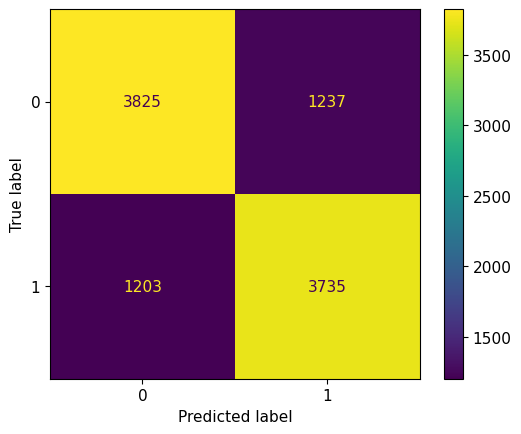

In [83]:
# Create a Comfusion matrix visually
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_model.classes_)
disp.plot()
plt.show()

### Logistic Regression with Standert Scaling dataset

In [84]:

lr_model = LogisticRegression(random_state=24, penalty='l1',C=0.01,solver='liblinear')
lr_model.fit(X_train_sc, y_train)

LogisticRegression(C=0.01, penalty='l1', random_state=24, solver='liblinear')

### Making predictions

In [85]:
y_pred_n_sc =lr_model.predict(X_test)

### Checking the results

In [86]:
cm = confusion_matrix(y_test, y_pred_n_sc)
acc = accuracy_score(y_test, y_pred_n_sc)*100
precision = precision_score(y_test, y_pred_n_sc) 
recall = recall_score(y_test, y_pred_n_sc) 
f1 = f1_score(y_test, y_pred_n_sc)

In [87]:
print('Accuracy:',acc)
print('Precision: ',round(precision,4))
print('Recall_score:',round(recall,4))
print('f1_score:',round(f1,4))
cm

Accuracy: 70.95
Precision:  0.7243
Recall_score: 0.6646
f1_score: 0.6932


array([[3813, 1249],
       [1656, 3282]], dtype=int64)

## Improving the model by using Parameter Tuning(Grid Search)

In [88]:
from sklearn.model_selection import GridSearchCV
C = [0.001,0.01,0.1,0.5, 0.9, 1, 2, 5, 10, 100, 1000]
penalty = ['l1','l2']
parameters = dict(C = C,penalty = penalty)
grid_search = GridSearchCV(estimator = lr_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 75.53 %
Best Parameters: {'C': 0.1, 'penalty': 'l1'}


## Improving model by using tuned parameters

In [89]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 24, penalty = 'l1', C=0.1,solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=24, solver='liblinear')

## Making predictions


In [90]:
y_pred_n =lr_model.predict(X_test)

## Checking results

In [91]:
cm = confusion_matrix(y_test, y_pred_n)
acc = accuracy_score(y_test, y_pred_n)*100
precision = precision_score(y_test, y_pred_n) 
recall = recall_score(y_test, y_pred_n) 
f1 = f1_score(y_test, y_pred_n)

In [92]:
print('Accuracy:',acc)
print('Precision: ',round(precision,4))
print('Recall_score:',round(recall,4))
print('f1_score:',round(f1,4))
cm

Accuracy: 75.97
Precision:  0.7568
Recall_score: 0.7564
f1_score: 0.7566


array([[3862, 1200],
       [1203, 3735]], dtype=int64)

### XGBoost Classifier

In [93]:

from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_score(y_test, y_pred_xgb)*100

77.38000000000001

### XGBoost Classifier with parameter tuning

In [94]:

xgb_model_p = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 seed=27)

xgb_model_p.fit(X_train, y_train)
y_pred_xgb_p = xgb_model_p.predict(X_test)

accuracy_score(y_test, y_pred_xgb_p)*100

77.83

### XGBOOST Classifier with Standert Scaling dataset

In [95]:
# XGB classifier with parameter tuning
xgb_model_p2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 seed=27)

xgb_model_p2.fit(X_train_sc, y_train)
y_pred_xgb_sc_p2 = xgb_model_p2.predict(X_test_sc)

accuracy_score(y_test, y_pred_xgb_sc_p2)*100

77.83

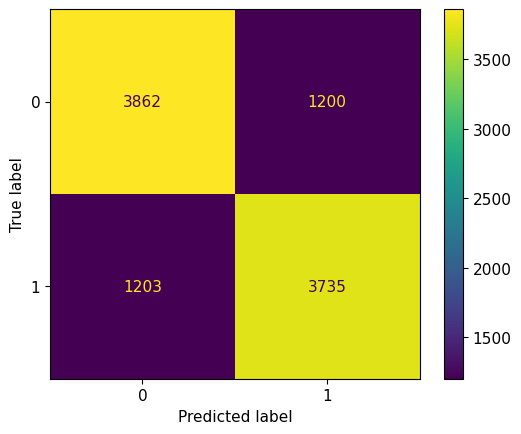

In [96]:
# Create a Comfusion matrix visually
disp_xg=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_model_p.classes_)
disp_xg.plot()
plt.show()

In [97]:
# Clasification Report
cr_xgb_p = classification_report(y_test, y_pred_xgb_p)
print("Classification report >>> \n", cr_xgb_p)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79      5062
           1       0.79      0.75      0.77      4938

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



## Presenting Final Results

In [98]:
final_result = pd.concat([test_identity , y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb_p

final_result

,user,enrolled,predicted result
11022,181591,0,0
7940,327670,1,1
30599,278248,1,1
12942,310218,0,0
32515,245735,1,1
...,...,...,...
25599,93054,0,0
5165,34474,0,0
10231,208707,1,1
13642,48220,0,0


## Save the Model
After completing the machine learning project or building the ML model, it needs to be deployed in an application. To deploy the ML model, it must first be saved. We can use either the pickle or joblib package to save the machine learning project.






## Pickle

In [99]:

import pickle

# save model
pickle.dump(xgb_model_p, open('ML_model.pickle', 'wb'))

# load model
ml_model_pl = pickle.load(open('ML_model.pickle', 'rb'))

# predict the output
y_pred_pl = ml_model_pl.predict(X_test)

# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred_pl)
print('Confussion matrix = \n', cm_pl)

# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl)*100)

Confussion matrix = 
 [[4064  998]
 [1219 3719]]
Accuracy of model =  77.83


## Conclusion

XGBoost provides the highest predictive power for classifying individuals, achieving an accuracy of 77.8%.
The model identifies users who are likely to subscribe and those who are not. The company can offer special incentives, such as a 50% discount on yearly subscriptions, to convert users classified by the model as unlikely to enroll. This approach can be profitable for the company. Additionally, the model can be implemented on a daily basis, allowing for instant offers to be sent to users.